In [ ]:
# Tanvi Deora
# median based background subtraction

In [1]:
import numpy as np
import cv2
print cv2.__version__
import matplotlib.pyplot as plt
import skimage.filters as filters
import os
%matplotlib inline
import time

2.4.11


In [2]:
# import all the packages needed for Hough Transform
from skimage import color
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter, circle

In [3]:
# import stuff to make gif or animations
import imageio
import matplotlib.animation as animation

In [4]:
# read the video

cap = cv2.VideoCapture('./2017_10_05/moth3_1_trial59.avi')

length = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.cv.CV_CAP_PROP_FPS)

print length, width, height, fps

364 648 488 30.0


In [5]:
# def load_all_images():
imgs = []
ret = True
ff=0

for ff in range(length):
    # Capture frame-by-frame
    ret, frame = cap.read()
    imgs.append(frame)
    print(ret)

imgs_array = np.asarray(imgs)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [6]:
imgs_array.shape, imgs_array.dtype

((364L, 488L, 648L), dtype('uint8'))

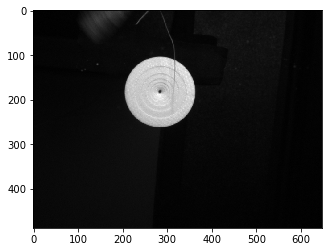

In [7]:
# read in an example frame to make sure you have the sequence loaded correctly
exampleFrame = imgs_array[363,:,:]
plt.imshow(exampleFrame, cmap = 'gray')

In [8]:
# define a function to get a background frame

def medianBackground(imgs_array):
    median_blank=np.median(imgs_array[:,:,:], axis=0)
    return(median_blank)

248.0

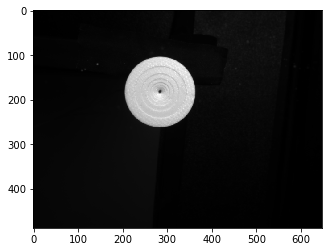

In [9]:
# extract the median image
bckgrnd=medianBackground(imgs_array)
plt.imshow(bckgrnd, cmap = 'gray')
np.amax(np.ravel(bckgrnd))

In [71]:
bckgrnd.shape

(488L, 648L)

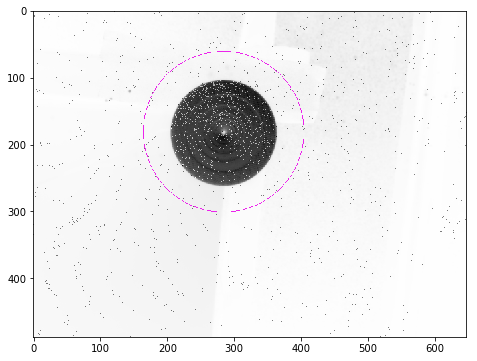

In [10]:
# extract the circular mask to identify the flower shape

# Get the edges
edges = canny(bckgrnd, sigma=3, low_threshold=25, high_threshold=50)
#pyplot.imshow(edges, cmap='gray')


# perform the hough transform to get circles of radii close to 100
hough_radii = np.arange(50, 150, 5)
hough_res = hough_circle(edges, hough_radii)
# Select the most prominent circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 6))
bckgrnd_tmp = color.gray2rgb(bckgrnd)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius+radius/2)
    bckgrnd_tmp[circy, circx] = (20, 220, 20)

ax.imshow(bckgrnd_tmp, cmap='gray')

In [11]:
hough_res.shape

(20L, 488L, 648L)

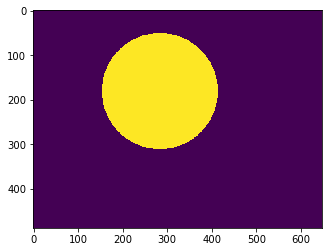

In [12]:
CircMask=np.zeros(bckgrnd.shape, dtype=np.uint8)
rr, cc = circle(cy, cx, radii+50)
CircMask[rr, cc] = 1
plt.imshow(CircMask)

In [13]:
Reduced_ImgsArray = [ ]
ctr = 0
for fNum in range(length):
    Convolve= np.multiply(imgs_array[fNum,:,:], CircMask)
    print(ctr)
    Reduced_ImgsArray.append(Convolve)
    ctr +=1 

Reduced_ImgsArray = np.asarray(Reduced_ImgsArray)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

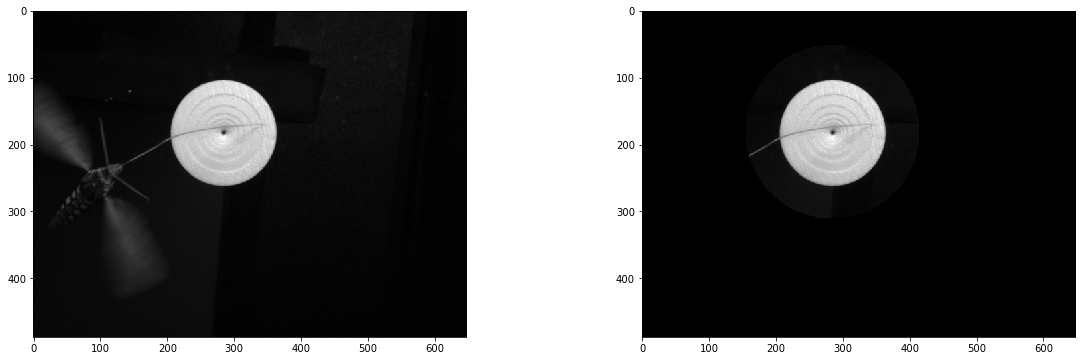

In [20]:
Reduced_ImgsArray.dtype

ff= 240
fig, ax = plt.subplots(1,2, figsize = (20,6))
ax[0].imshow(imgs_array[ff,:,:], cmap = 'gray')
ax[1].imshow(Reduced_ImgsArray[ff,:,:], cmap='gray')

(array([  2.96000000e+05,   3.58000000e+02,   1.70000000e+02,
          1.50000000e+02,   1.60000000e+02,   3.04000000e+02,
          8.05000000e+02,   8.57800000e+03,   8.92500000e+03,
          7.74000000e+02]),
 array([   0. ,   24.8,   49.6,   74.4,   99.2,  124. ,  148.8,  173.6,
         198.4,  223.2,  248. ]),
 <a list of 10 Patch objects>)

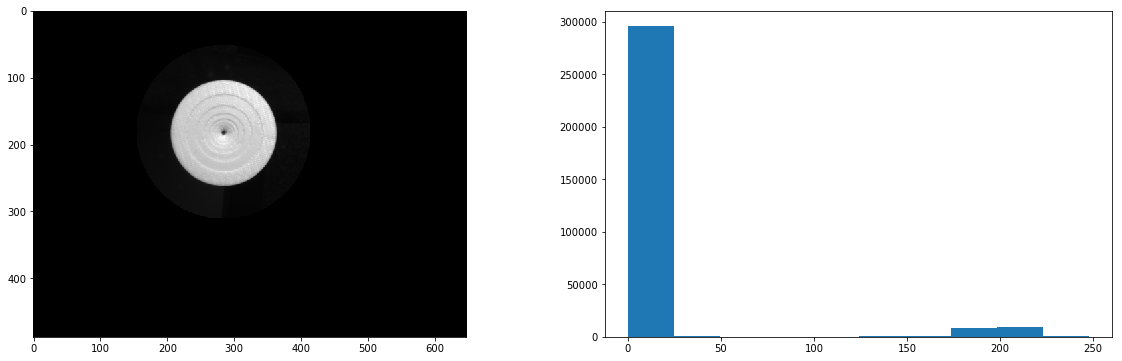

In [77]:
# METHOD 1: try the median subtraction and 95th percentile for just the pixels within the mask
# part a - extract background using median
Backgrnd_extraction=medianBackground(Reduced_ImgsArray)


fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6)) 
ax1.imshow(Backgrnd_extraction, cmap = 'gray')
ax2.hist(Backgrnd_extraction.ravel())

In [78]:

# METHOD 1 : use median within the small radii to extract the background image
# part b - define a function to normalize the pizxel values between 0 and 255

def transformation(X):
    # normalizes a range of pixels to 0-255
#     X=np.array([-10, -4, -6, 0, 2, 3, 4, 5, 6, 10])
    m = X.min()
    X_transformed = (X - X.min()) * 255.0/np.ptp(X)
    return X_transformed

In [19]:
# METHOD 1
# part c -  remove backgrnd and threshold to 97 percentile and stitch the images together

def histogramBasedThreshold(imgs_array, referenceImg):
    Final_imgs = [ ]
    ctr = 0
    length=len(imgs_array)
    for ff in range(length):    
        filtered_frame = skimage.filters.gaussian(imgs_array[ff,:,:], sigma=.5)
        
        # Subtract each frame from the reference frame
        #frame_subtract = filtered_frame - referenceImg
        frame_subtract = imgs_array[ff,:,:]-referenceImg
        # scale the pixel values to 0-255
        frame_subtr_trans = transformation(frame_subtract)

    
        # Calculate the 95th percentile for the pixel intensity histogram   
        pixelVal=frame_subtract.ravel()
        p = np.percentile(pixelVal, 99.9)
        binary = abs(frame_subtract) < p
        
#         # use otsu_thresholding method
#         threshold_value = skimage.filters.threshold_otsu(frame_subtract)
#         p = threshold_value
#         binary = abs(frame_subtract) < p
        
            
        # convery the binary to 0 and 255
        binary_trans = binary * 255.0
        print ctr
        
        meta = np.concatenate((imgs_array[ff,:,:], frame_subtr_trans, binary_trans), axis=1)
        
        Final_imgs.append(meta)
        ctr +=1
    Concat_frames = np.asarray(Final_imgs)
    return Concat_frames

In [63]:
SillyMethodFrames=histogramBasedThreshold(Reduced_ImgsArray, Backgrnd_extraction)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

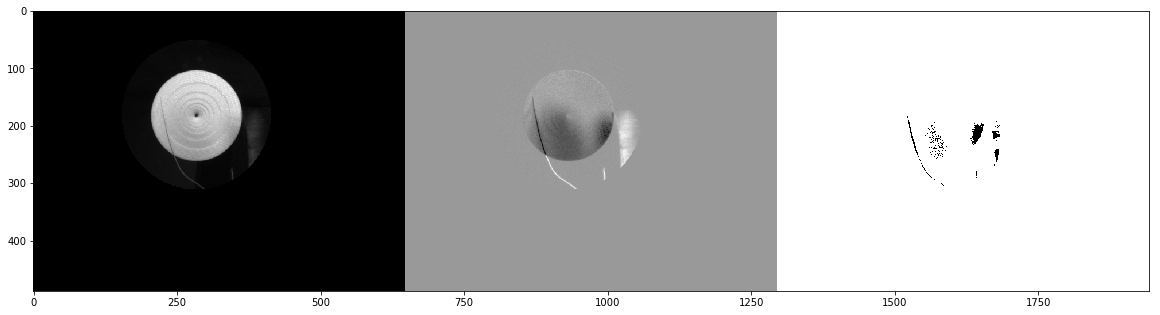

In [67]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 6))
ax.imshow(SillyMethodFrames[160,:,:], cmap='gray')

In [37]:
#newData=imgs_array[:,100:300,150:450]
#newData.shape

(364L, 200L, 300L)

In [17]:
# METHOD 2: use SVD for background subtraction
# part 1 - make the dataset the correct size

test = np.reshape(Reduced_ImgsArray, (364,-1)).transpose()
test.shape

(316224L, 364L)

In [ ]:
# understand reshape

x=np.arange(18).reshape(2,3,3)
print(x)
x.swapaxes(2,1)

In [73]:
Reduced_ImgsArray.shape

(364L, 488L, 648L)

In [18]:
X = test[:, 0:-1]
Y = test[:, 1:]

r = 100

U, Sig, Vs = np.linalg.svd(X, full_matrices=False)
Ustar = U[:, :r].conj().transpose()
diagSinv = np.diag(1/Sig[:r])
V = Vs.conj().transpose()[:, :r]
Atilde = Ustar.dot(Y).dot(V).dot(diagSinv)

In [19]:
Atilde.shape

(100L, 100L)

In [55]:
Lambda, W = np.linalg.eig(Atilde)
omega = np.log(Lambda)
Phi = Y.dot(V).dot(diagSinv).dot(W)

bkg = (abs(omega) <= 0.5).nonzero()
frg = (abs(omega) > 0.5).nonzero()

# background
z0 = np.linalg.lstsq(Phi[:, bkg].squeeze(), X[:,0])[0]
Z = np.asarray([np.power(Lambda[bkg], t) for t in range(363)]).transpose()
Ytilde_b = Phi[:, bkg].squeeze().dot(Z)

# foreground
z0 = np.linalg.lstsq(Phi[:, frg].squeeze(), X[:,0])[0]
Z = np.asarray([np.power(Lambda[frg], t) for t in range(363)]).transpose()
Ytilde_f = Phi[:, frg].squeeze().dot(Z)

In [56]:
Ytilde_b.shape

(316224L, 363L)

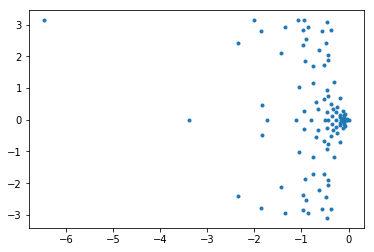

In [54]:
plt.plot(omega.real, omega.imag, '.')

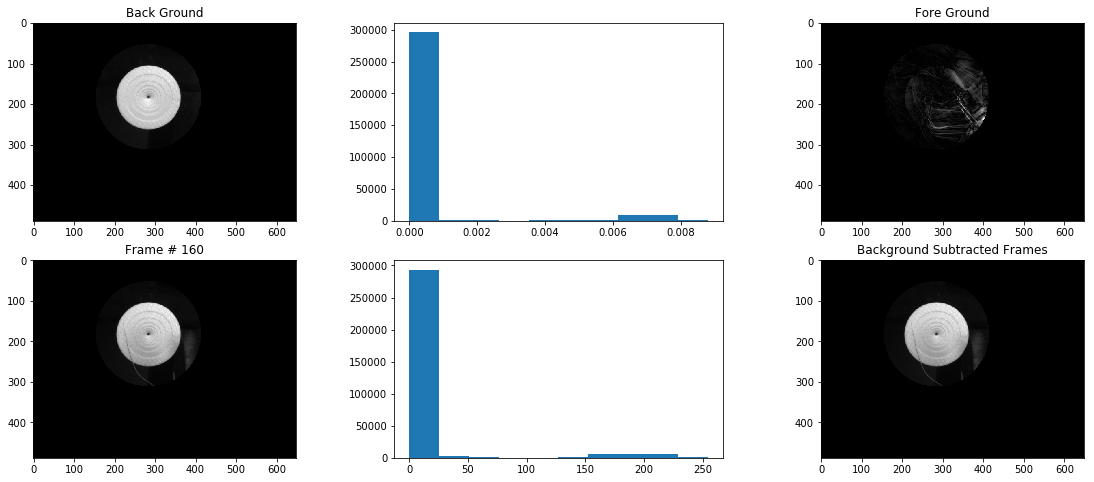

In [57]:
ff=160

fig, ax= plt.subplots(2,3, figsize=(20,8))

ax[0,0].imshow(np.reshape(np.abs(Ytilde_b[:, ff]), (488, 648)), cmap='gray')
ax[0,0].set_title('Back Ground')

bla = np.reshape(np.abs(Ytilde_b[:, ff]), (488, 648))
ax[0,1].hist(bla.ravel())

ax[0,2].imshow(np.reshape(np.abs(Ytilde_f[:, ff]), (488, 648)), cmap='gray')
ax[0,2].set_title('Fore Ground')

ax[1,0].imshow(Reduced_ImgsArray[ff,:,:], cmap='gray')
ax[1,0].set_title('Frame # ' + str(ff))

ax[1,1].hist(Reduced_ImgsArray[ff,:,:].ravel())

ax[1,2].imshow(Reduced_ImgsArray[ff,:,:] - np.reshape(np.abs(Ytilde_b[:, ff]), (488, 648)), cmap='gray')
ax[1,2].set_title('Background Subtracted Frames')

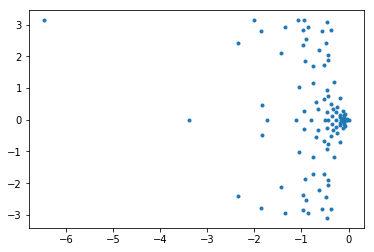

(2L, 3L)

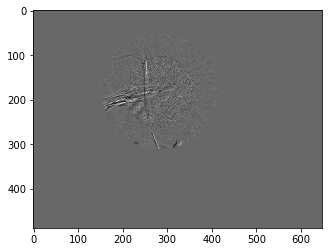

In [46]:
plt.imshow(np.reshape(U[:, 326], (488, 648)), cmap = 'gray')

In [103]:
frg

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 115, 116, 117, 118, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186, 187, 188

In [104]:
bkg

(array([106, 107, 108, 109, 110, 111, 112, 113, 114, 119, 120], dtype=int64),)

In [ ]:
# extraction of proboscis based on simply the background subtracted frames without thresholding using Sobel transform

In [79]:
# subtract all the frames with the reduced background
Backgrnd_subtracted = []
ctr=0
for ff in range(length):
    img = Reduced_ImgsArray[ff, :,:] - Backgrnd_extraction
    print ctr
    
    Backgrnd_subtracted.append(img)
    ctr +=1
    
backgrnd_subtracted_array = np.asarray(Backgrnd_subtracted)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(array([  1.10000000e+01,   1.40000000e+01,   1.90000000e+01,
          4.00000000e+01,   1.05000000e+02,   3.04394000e+05,
          1.15050000e+04,   9.20000000e+01,   3.80000000e+01,
          6.00000000e+00]),
 array([-110. ,  -91.2,  -72.4,  -53.6,  -34.8,  -16. ,    2.8,   21.6,
          40.4,   59.2,   78. ]),
 <a list of 10 Patch objects>)

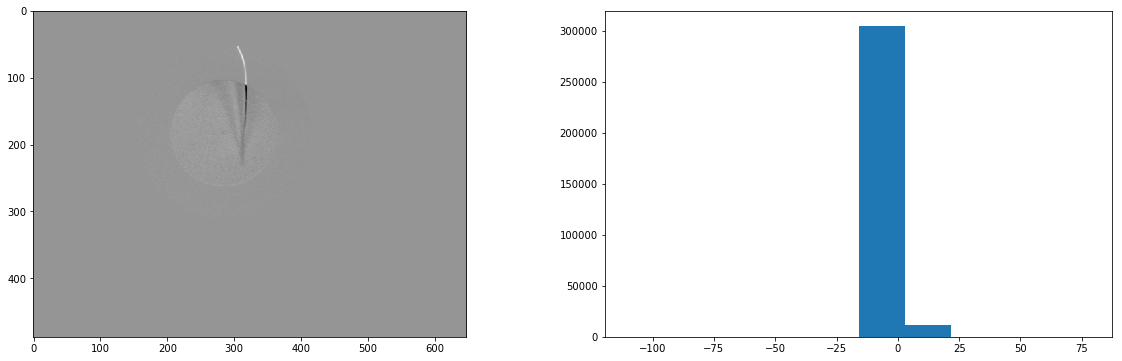

In [81]:
backgrnd_subtracted_array.shape

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6)) 
ax1.imshow(backgrnd_subtracted_array[363,:,:], cmap = 'gray')
ax2.hist(backgrnd_subtracted_array[363,:,:].ravel())

In [83]:
# use sobel filter to find proboscis
edges = []
ctr = 0
for ff in range(length):
    mask = filters.sobel(backgrnd_subtracted_array[ff,:,:])
    print(ctr)
    edges.append(mask)
    ctr +=1
    
edges_array = np.asarray(edges)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

(array([  1.14697274e+08,   2.55632000e+05,   1.00378000e+05,
          3.75950000e+04,   1.16140000e+04,   2.34500000e+03,
          5.03000000e+02,   1.51000000e+02,   3.80000000e+01,
          6.00000000e+00]),
 array([   0.        ,   14.08851483,   28.17702965,   42.26554448,
          56.3540593 ,   70.44257413,   84.53108896,   98.61960378,
         112.70811861,  126.79663343,  140.88514826]),
 <a list of 10 Patch objects>)

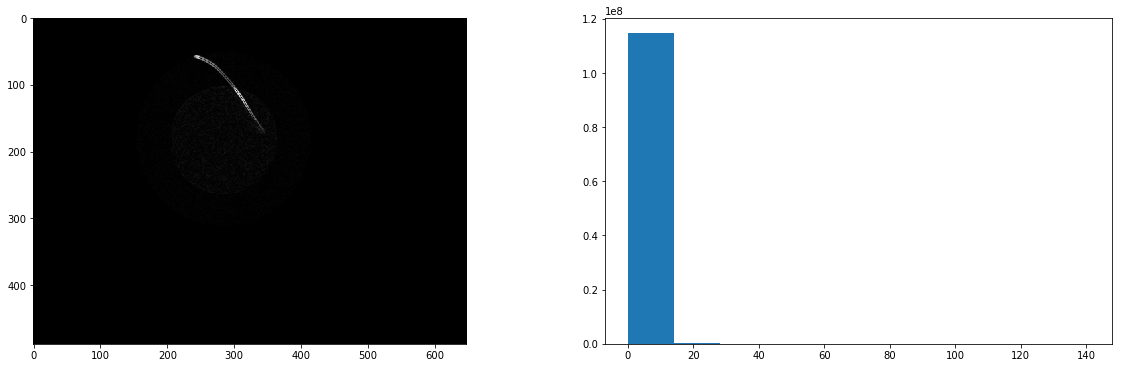

In [84]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,nrows = 1, figsize = (20, 6))
ax1.imshow(edges_array[320,:,:], cmap = 'gray')
ax2.hist(edges_array.ravel())

In [47]:
# transform both backgrnd and extracted image before stiching together
Sobel_image = []

for ff in range(length):
    subtract_frame = transformation(backgrnd_subtracted[ff,:,:])
    edges_frame = transformation(edges_array[ff,:,:])
    meta = np.concatenate((imgs_array[ff,:,:], subtract_frame, edges_frame), axis=1)
    
    Sobel_image.append(meta)

Sobel_frames = np.asarray(Sobel_image)

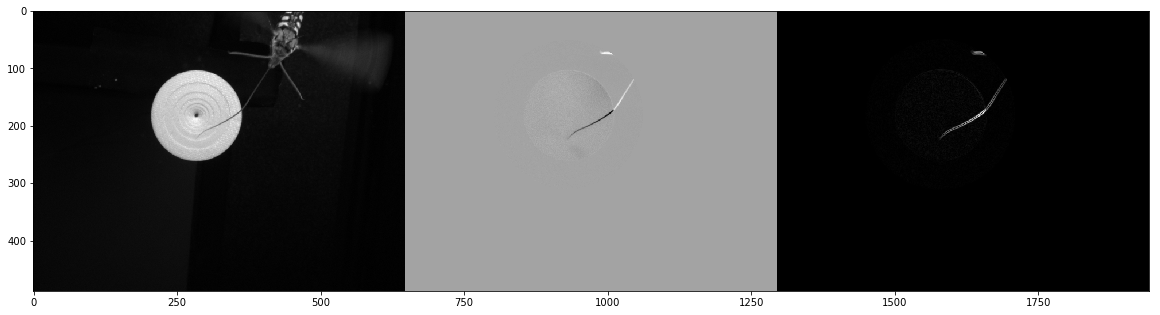

In [50]:
fig, ax = plt.subplots(1, figsize = (20,6))
ax.imshow(Sobel_frames[1,:,:], cmap = 'gray')

In [51]:
# write photos to a directory in desk

def functionName(directoryname, , ..):
    
    
    ctr = 0
    photoDir = "C:\\Users\\Tanvi\\Documents\\Tom Daniel lab\\testBehaviorAnalysis\\2017_10_05\\' + directoryname + '\\"

    # make directory, if it doesn't exist
    if not os.path.exists(photoDir):
        os.makedirs(photoDir)

    for ff in range(length):
        img2 = Sobel_frames[ff,:,:]
        cv2.imwrite(photoDir + str(ctr).zfill(4) + '.png', img2)
        print(ctr)
        ctr += 1
    
    return()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [85]:
# write the edges as a separate figs file and save as videos
edges_alone = []
for ff in range(length):
    img1 = transformation(edges_array[ff,:,:])
    edges_alone.append(img1)

edges_alone = np.asarray(edges_alone)

In [86]:
edges_alone.shape

(364L, 488L, 648L)

In [ ]:
# create animation to see all the frames - DID NOT WORK!!

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 6))
data = np.zeros((488,648), dtype=np.uint8)
im = ax.imshow(data, cmap='gray')


def init():
    im.set_data
    return im
    
def animate(i):
    im.set_data(data = backgrnd_suctracted[i,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = length, 
                              interval = 50)

In [25]:
# save frames and display as a gif
path = os.getcwd()

# save the edges as a gif
imageio.mimsave(path+'edges'+'.gif',edges)

AttributeError: 'module' object has no attribute 'register_extensions'